# 1. Initial step - Import necessary library

In [1]:
#For general data manipulation and vistualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


#For Preporcession and cleaning step
from sklearn.preprocessing import MinMaxScaler

#For training setp
from sklearn.model_selection import train_test_split
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

#For Evaluation
from sklearn.metrics import accuracy_score

# 2. Load data

lấy dữ liệu từ trang: https://www.nasdaq.com/market-activity/commodities/gc%3Acmx

In [2]:
dateparse = lambda x: datetime.strptime(x, '%m/%d/%Y')
file = 'C:\Users\ZoomUser\OneDrive - VNU-HCMUS\Desktop/gold.csv'
df = pd.read_csv(file, parse_dates=['Date'], date_parser=dateparse)

Bộ dữ liệu này bao gồm giá vàng theo thời gian thực tính bằng USD từ năm 2012 đến năm 2022.\
Date - Ngày ghi giá\
Close - Ngày đóng giá vàng tính bằng USD\
Volume - Tổng lượng mua và bán của hàng hoá vàng \
Open - Giá mở của vàng vào ngày cụ thể đó \
High - Giá vàng cao nhất của ngày cụ thể đó \
Low - Giá vàng thấp nhất vào ngày cụ thể đó.

In [3]:
df.head(5)

,Date,Close/Last,Volume,Open,High,Low
0,2022-10-28,1648.3,186519.0,1667.2,1670.9,1640.7
1,2022-10-27,1668.8,180599.0,1668.8,1674.8,1658.5
2,2022-10-26,1669.2,183453.0,1657.7,1679.4,1653.8
3,2022-10-25,1658.0,178706.0,1654.5,1666.8,1641.2
4,2022-10-24,1654.1,167448.0,1662.9,1675.5,1648.0


In [4]:
df.shape

(2547, 6)

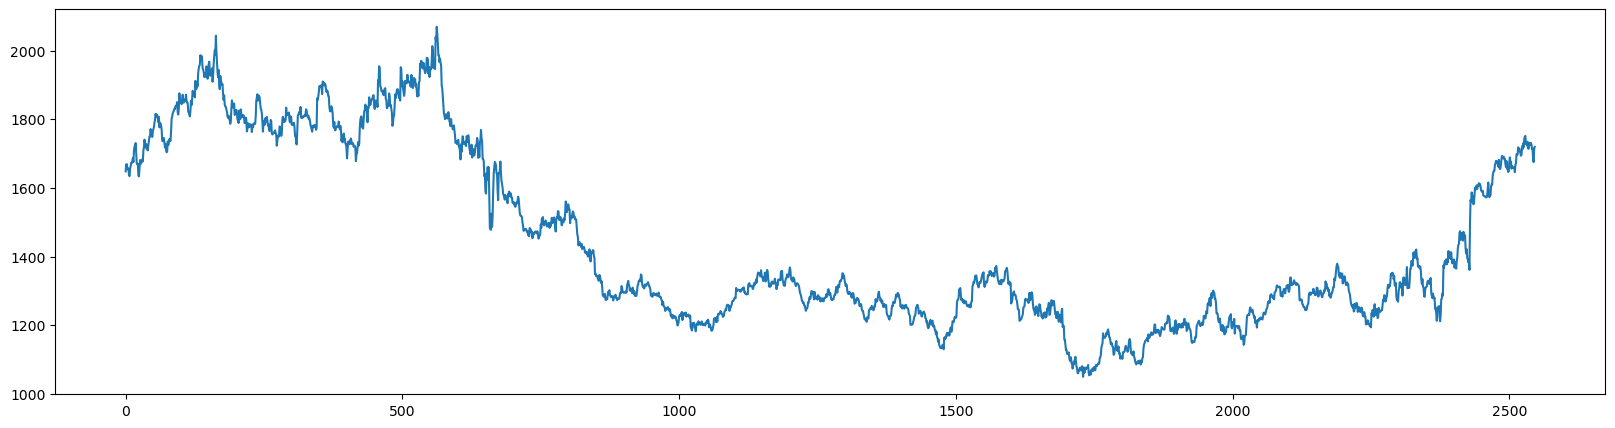

In [5]:
v_df = df[['Close/Last']]
plt.figure(figsize=(20,5))
plt.plot(v_df)

# 3. Statistic information review

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 0 to 2546
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2547 non-null   datetime64[ns]
 1   Close/Last  2547 non-null   float64       
 2   Volume      2508 non-null   float64       
 3   Open        2547 non-null   float64       
 4   High        2547 non-null   float64       
 5   Low         2547 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 119.5 KB


Các thuộc tính có kiểu dữ liệu phù hợp để phân tích, cột Date đã có kiểu Datetime

In [7]:
df.describe()

,Close/Last,Volume,Open,High,Low
count,2547.000000,2508.000000,2547.000000,2547.000000,2547.000000
mean,1437.557008,182067.668660,1437.743031,1447.083235,1427.891991
std,255.898467,97589.342619,256.239938,257.924158,253.641116
min,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,1243.450000,120901.000000,1243.000000,1251.000000,1235.250000
50%,1318.500000,168425.500000,1319.000000,1326.300000,1310.900000
75%,1698.100000,231754.000000,1701.450000,1715.300000,1684.000000
max,2069.400000,787217.000000,2076.400000,2082.100000,2049.000000


In [8]:
# Ve4rified shape
df.shape

(2547, 6)

In [9]:
# Verfified the occurent of  missing in dataframe
df.isna().any().any()

True

Dữ liệu có missing value nên phải sử lí lại dữ liệu

In [10]:
# bỏ các hàng có có missing value
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
# xem lại kích thước của dữ liệu
df.shape

(2508, 6)

In [11]:
df.describe()

,Close/Last,Volume,Open,High,Low
count,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000
mean,1438.936164,182067.668660,1439.127552,1448.610526,1429.120853
std,256.487316,97589.342619,256.831389,258.485303,254.250367
min,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,1244.075000,120901.000000,1243.900000,1251.500000,1235.800000
50%,1318.950000,168425.500000,1319.700000,1327.300000,1311.150000
75%,1705.200000,231754.000000,1707.125000,1718.100000,1687.525000
max,2069.400000,787217.000000,2076.400000,2082.100000,2049.000000


Sau khi sử lí missing value chúng ta loại bỏ đi 39 hàng trong bộ dữ liệu \
Do 39 dòng nhỏ so với số lượng hơn 2000 dòng trong bộ dữ liệu nên sau khi loại bỏ 39 dòng, bộ dữ liệu vẫn còn đủ tốt để phân tích và train model

# 4. Data visualisation

Sử dụng hàm pairplot, heatmap để tìm kiếm các biến có tương quan mạnh với giá vàng 

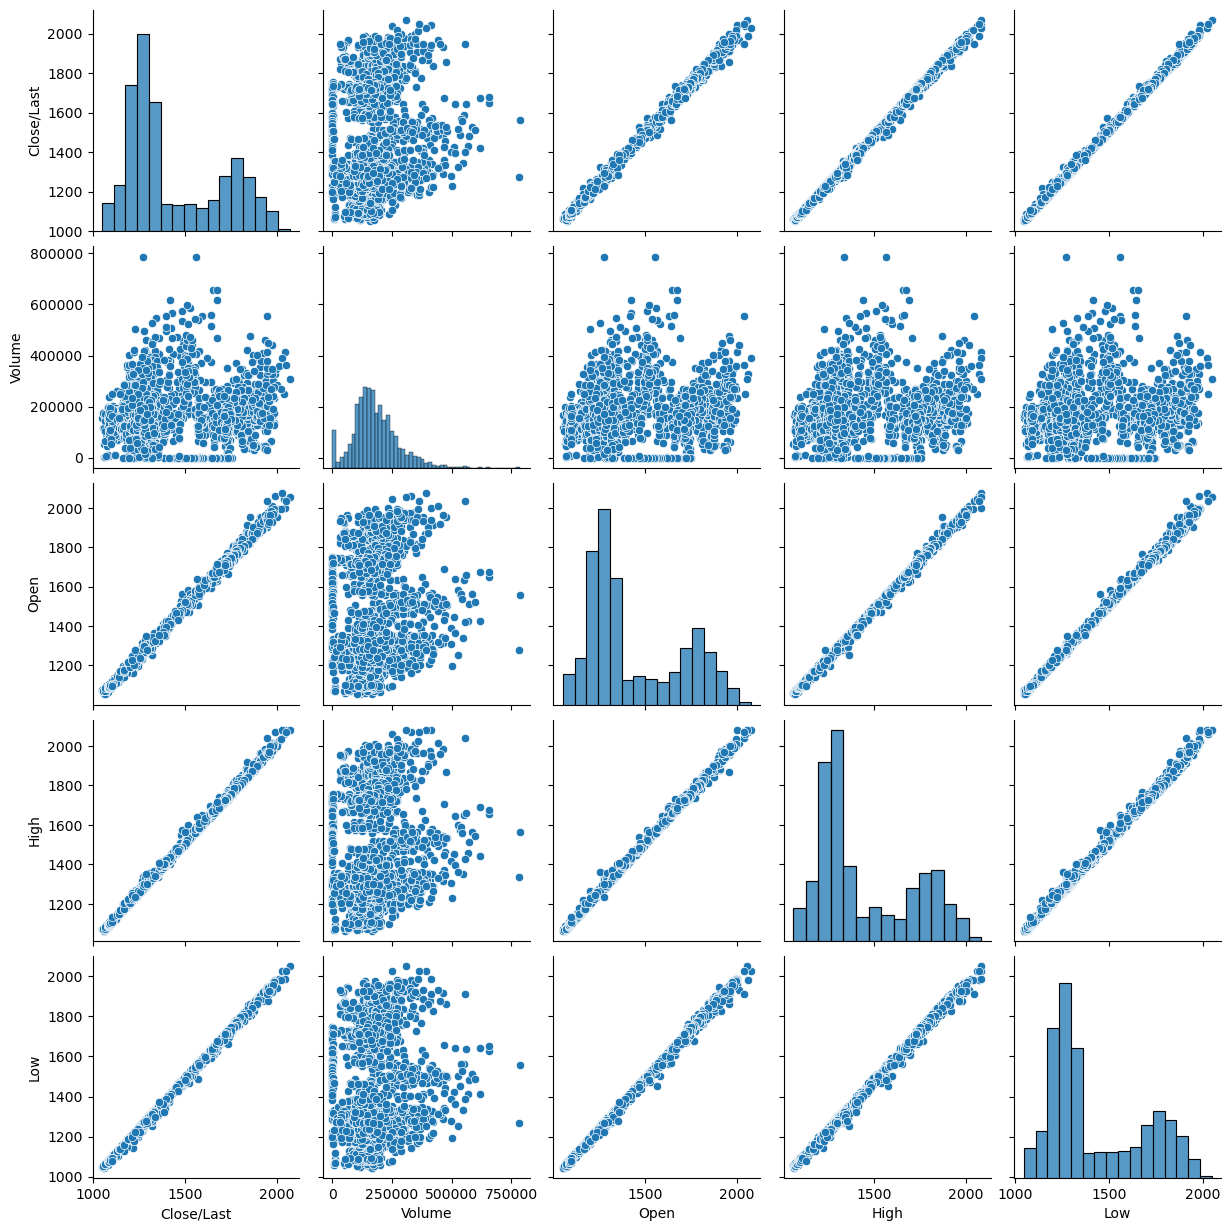

In [12]:
sns.pairplot(df)

Nhìn vào biểu đồ trên ta thấy các biến Close/Last, Open, High, Low có tương quan mạnh với nhau 

Ngoài ra có thể sử dụng heatmap để tìm tương quan giữa các biến 

<AxesSubplot:>

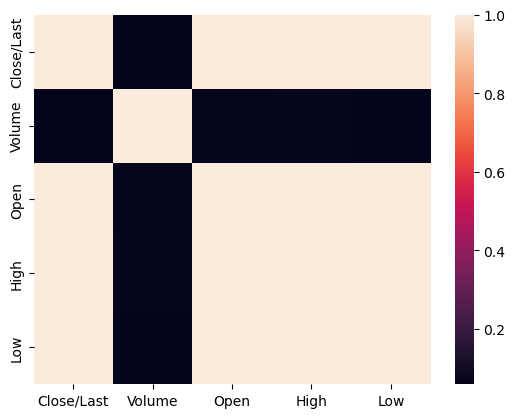

In [13]:
sns.heatmap(df.corr())

Qua biểu đồ trên cho thấy các biến Close/Last, Open, High, Low có tương quan mạnh với nhau

# 5. Features engineering and selection

In [14]:
#Use strong correlation feature to train model
features = ['Open','High','Low'] 
label = ['Close/Last']

In [15]:
X_df = df[features]
y_df = df[label]

Sử dụng MinMaxScaler của sklearn để chuẩn hoá lại dữ liệu trong khoảng từ 0 đến 1

In [17]:
scaler = MinMaxScaler()
X_df_scaled = scaler.fit_transform(X_df)
y_df_scaled = scaler.fit_transform(y_df)

Phía dưới là dữ liệu sau khi biến đổi:

In [18]:
X_df_scaled

array([[0.60074154, 0.59662547, 0.59316461],
       [0.60230266, 0.60045125, 0.61090076],
       [0.59147234, 0.6049637 , 0.60621762],
       ...,
       [0.64796566, 0.64204434, 0.62714229],
       [0.65264904, 0.65214832, 0.66729773],
       [0.64279442, 0.65126545, 0.66201674]])

In [19]:
y_df_scaled

array([[0.5870759 ],
       [0.60717788],
       [0.60757011],
       ...,
       [0.61345362],
       [0.65297117],
       [0.65650127]])

so sánh dữ liệu trước và sau khi biến đổi

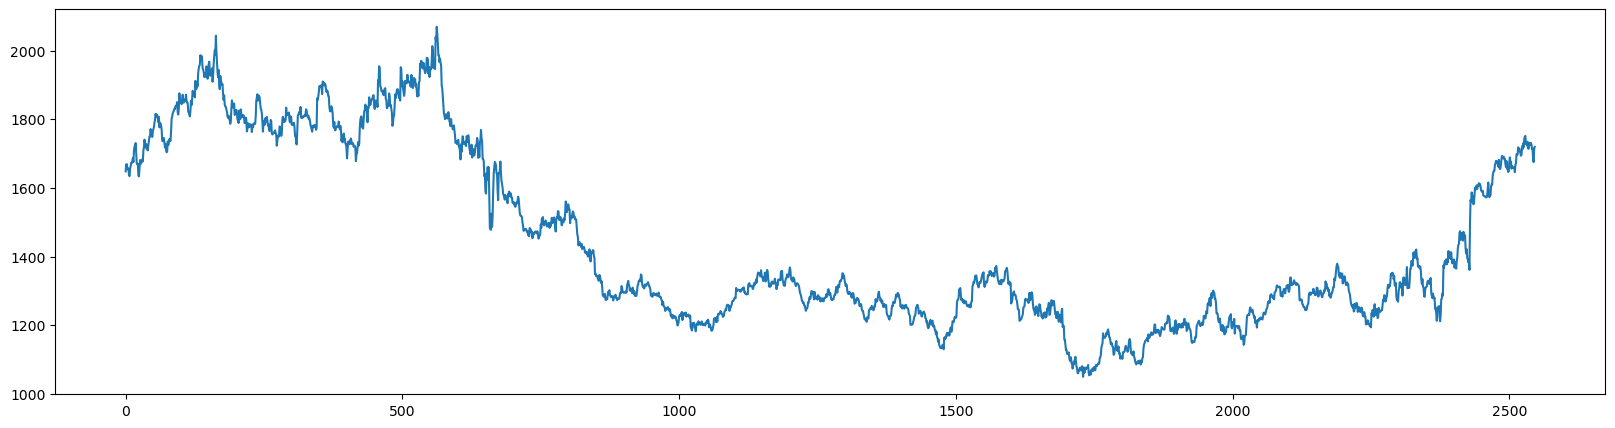

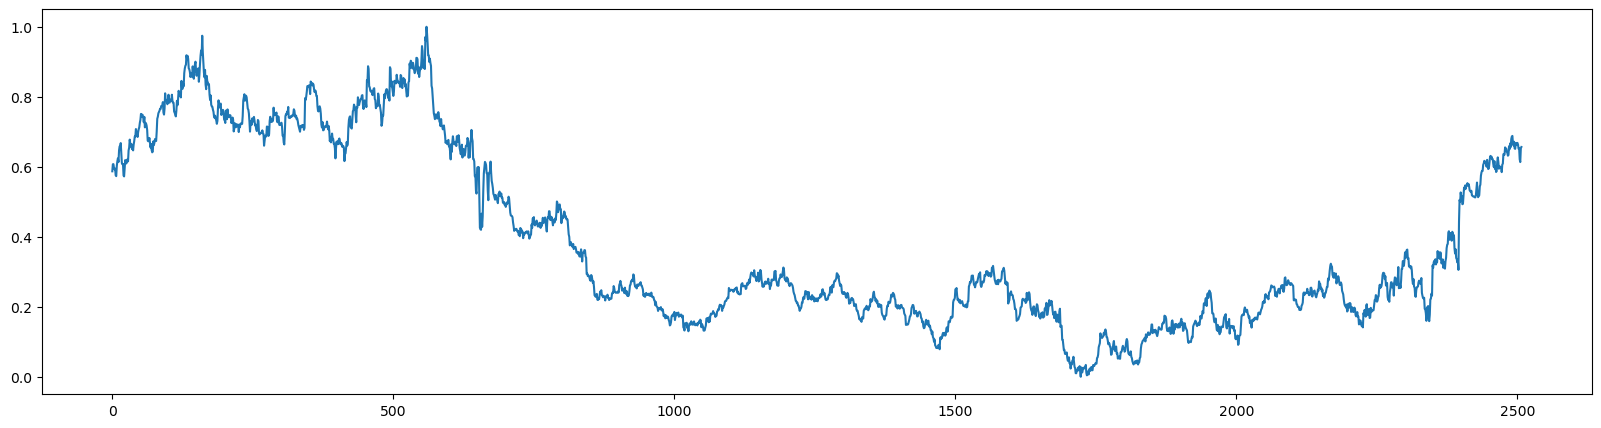

In [20]:
plt.figure(figsize=(20,5))
plt.plot(v_df)
plt.figure(figsize=(20,5))
plt.plot(y_df_scaled)

# 6. Model creation and training

Tiếp theo, tách dữ liệu để train model theo kích thước 8:2

In [21]:
# Split training and tesing set with portion of 80% : 20% respectively.
X_train, X_test, y_train, y_test = train_test_split(X_df_scaled,y_df_scaled,shuffle = False, test_size = 0.2)

In [22]:
# xem dữ liệu sau khi tách 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2006, 3)
(502, 3)
(2006, 1)
(502, 1)


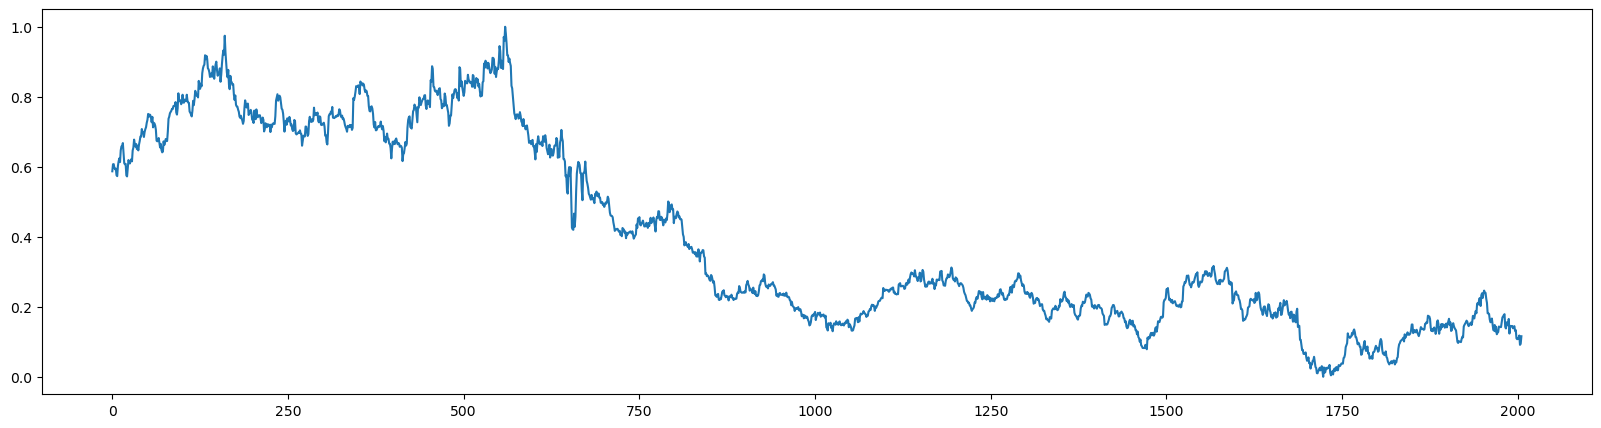

In [23]:
plt.figure(figsize=(20,5))
plt.plot(y_train)

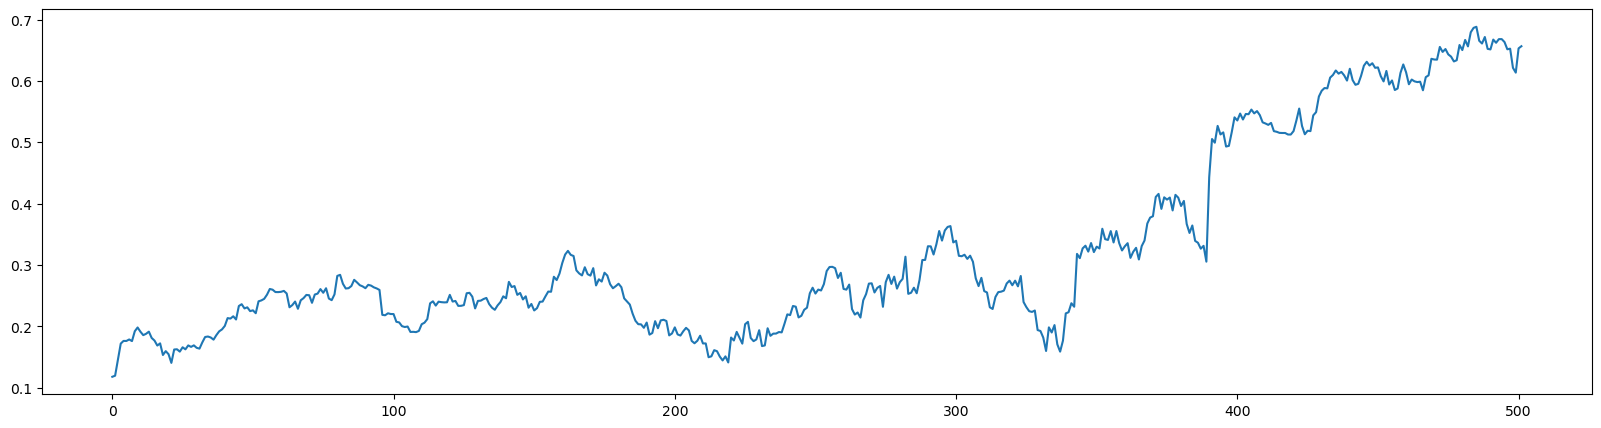

In [24]:
plt.figure(figsize=(20,5))
plt.plot(y_test)

In [171]:
import matplotlib.dates as mdates
# Hàm để đánh giá mô hình
def validate_result(model, model_name):
    predicted = model.predict(X_test)
    RSME_score = np.sqrt(mean_squared_error(y_test, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(y_test, predicted)
    print('R2 score: ', R2_score)
    
    plt.figure(figsize=(20,5))
    plt.plot(predicted,'r', label='Predict')
    plt.plot(y_test,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

Create ANN model with :
* 3 hidden layers 
* 40 Neuron node on each layer
* Relu activation function

In [187]:
model = Sequential()
model.add(Dense(40, input_dim = 3, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 40)                160       
                                                                 
 dense_17 (Dense)            (None, 40)                1640      
                                                                 
 dense_18 (Dense)            (None, 40)                1640      
                                                                 
 dense_19 (Dense)            (None, 1)                 41        
                                                                 
Total params: 3,481
Trainable params: 3,481
Non-trainable params: 0
_________________________________________________________________


The model will compile with :
* Adam optimiser function
* With mean squared error loss function


The training procress with :
* 100 Epochs
* 50 rows of batch size
* Coross validation 20% of training set

In [188]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size = 50,verbose = 0, validation_split = 0.25)

In [195]:
y_pred = model.predict(X_test)
pd.DataFrame({'y_pre:': y_pred.ravel(), 'y:': y_test.ravel()})

16/16 [==============================] - 0s 3ms/step


,y_pre:,y:
0,0.115628,0.117866
1,0.126093,0.119631
2,0.151414,0.146107
3,0.163554,0.171896
4,0.177446,0.176309
...,...,...
497,0.647072,0.652481
498,0.623443,0.621298
499,0.630892,0.613454
500,0.664748,0.652971


16/16 [==============================] - 0s 3ms/step
RMSE:  0.007009869468134474
R2 score:  0.9979481978378579


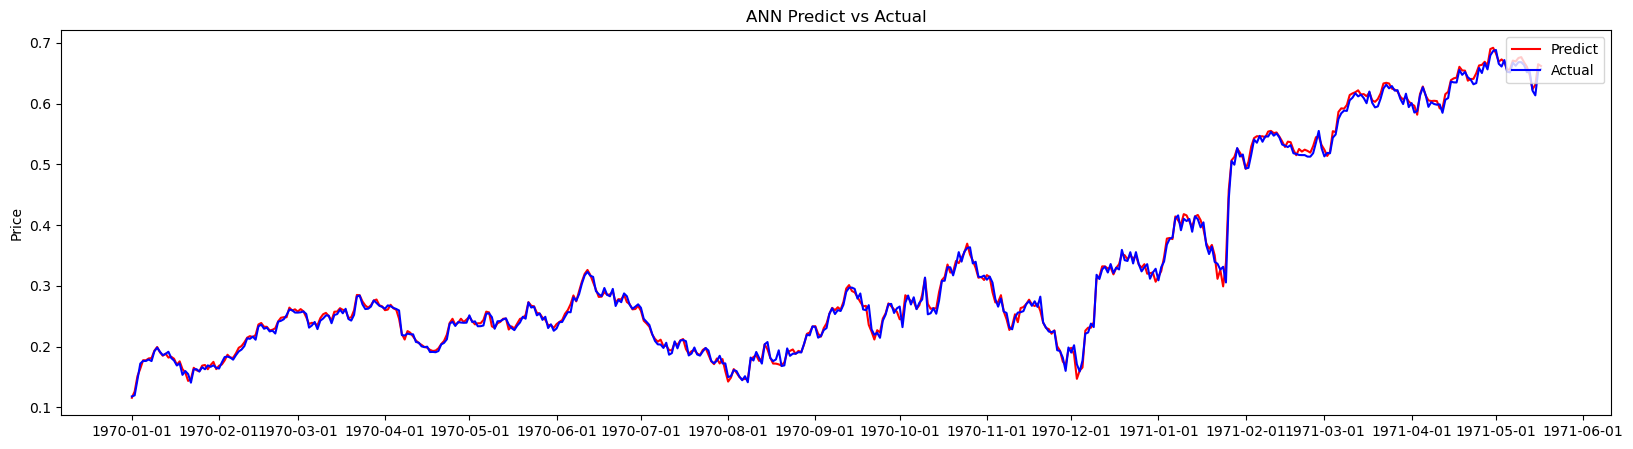

In [190]:
validate_result(model, 'ANN')

# DecisionTreeRegressor

sử dụng mô hình DecisionTree Regressor để dự đoán 

In [196]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = DecisionTreeRegressor(random_state = 1)

In [197]:
DT_model = model.fit(X_train, y_train)

In [198]:
y_pred = DT_model.predict(X_test)
pd.DataFrame({'y_pre:': y_pred, 'y:': y_test.ravel()})

,y_pre:,y:
0,0.121200,0.117866
1,0.145421,0.119631
2,0.158659,0.146107
3,0.170524,0.171896
4,0.172387,0.176309
...,...,...
497,0.647774,0.652481
498,0.609433,0.621298
499,0.616199,0.613454
500,0.657188,0.652971


RMSE:  0.011163564329622044
R2 score:  0.9947961906172589


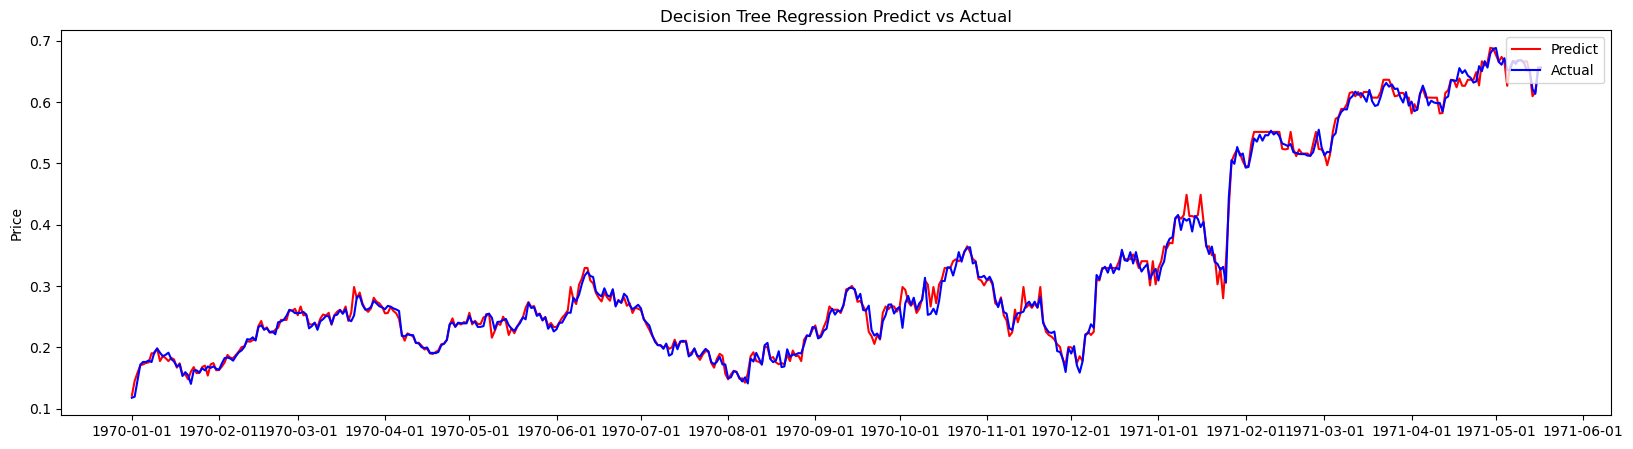

In [176]:
validate_result(DT_model, 'Decision Tree Regression')

# RamdomForest

In [177]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,max_features = 'auto',max_depth = 10 ,random_state=0)
RF_model= model.fit(X_train, y_train.ravel())

In [199]:
y_pred = RFmodel.predict(X_test)
pd.DataFrame({'y_pre:': y_pred, 'y:': y_test.ravel()})

,y_pre:,y:
0,0.115861,0.117866
1,0.136633,0.119631
2,0.154081,0.146107
3,0.167850,0.171896
4,0.174844,0.176309
...,...,...
497,0.647076,0.652481
498,0.614408,0.621298
499,0.625055,0.613454
500,0.658717,0.652971


RMSE:  0.008297463834112308
R2 score:  0.9971252084645066


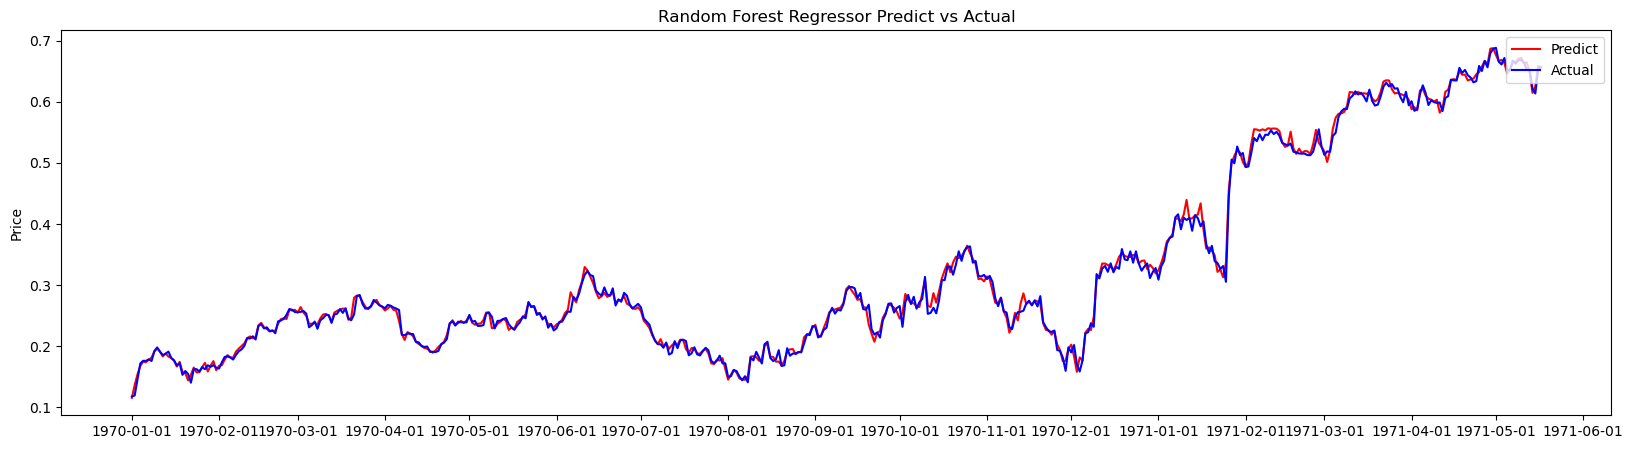

In [180]:
validate_result(RF_model, 'Random Forest Regressor')

# SVR

In [185]:
from sklearn.svm import SVR
# Save all soultion models
solution_models = {}
# SVR with  linear Kernel
svr_lin = SVR(kernel='linear')
linear_svr_clf_feat = svr_lin.fit(X_train,y_train.ravel())

In [200]:
y_pred = linear_svr_clf_feat.predict(X_test)
pd.DataFrame({'y_pre:': y_pred, 'y:': y_test.ravel()})

,y_pre:,y:
0,0.184811,0.117866
1,0.193487,0.119631
2,0.216592,0.146107
3,0.228227,0.171896
4,0.232949,0.176309
...,...,...
497,0.612882,0.652481
498,0.598026,0.621298
499,0.617337,0.613454
500,0.632466,0.652971


RMSE:  0.04282827588862639
R2 score:  0.9234091649720787


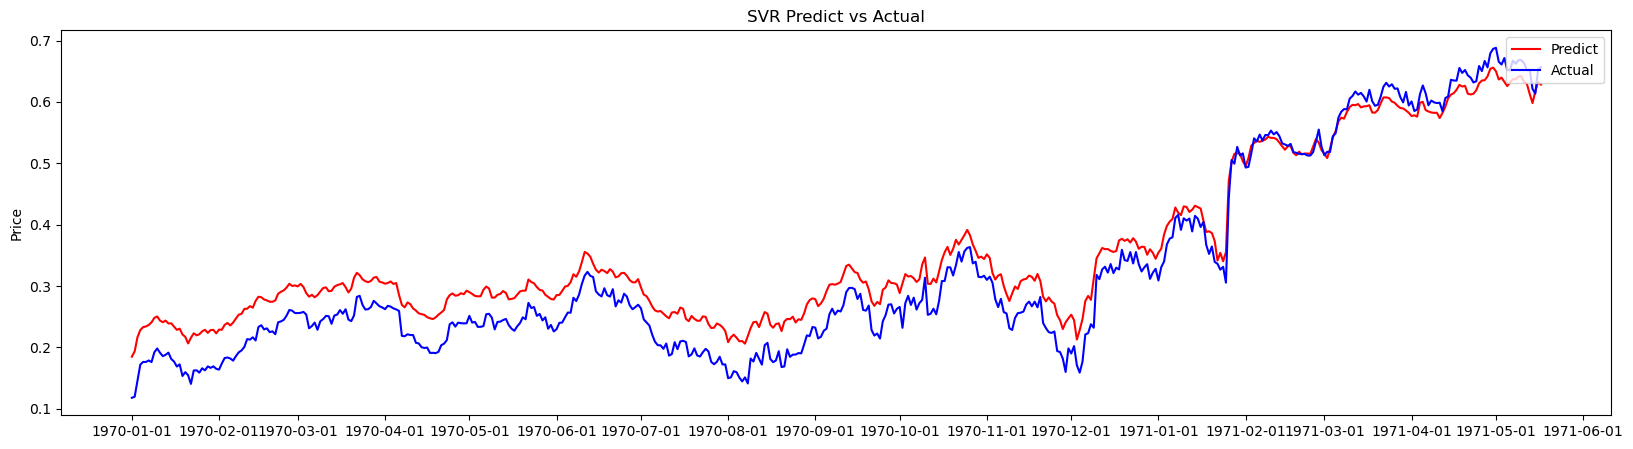

In [186]:
validate_result(linear_svr_clf_feat, 'SVR')